<font color ='Navy'><center> __BruFace__ </center></font>
<br>Mechanical Engineering <br>  __Mechanical vibrations__ <br>
***


<font color='Navy'><h1><center> Session 6 : Damping and Self-excited vibrations</center></h1></font> 
***
<div class="alert alert-block alert-info">
<center><b>Welcome to this 6th session, in this session we will discuss the different models for damping and look into the phenomenom that is flutter. </b></center>



In [1]:
# don't worry about this line 
# For local use : %matplotlib notebook; for use on jupyterLab: %matplotlib widget
%matplotlib widget


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.linalg as linalg

# Damping of MDOF systems

## General damping

In this session we start by looking into more complex damping scenario's for MDOF systems. 


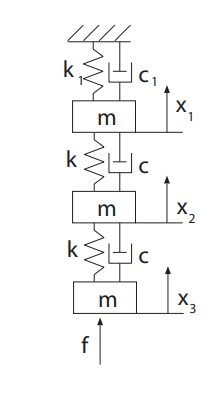

We start with revisiting our classic 3DOF system from the previous sessions. We can use our past implementation of `build_3DOF_matrices` to generate the M, C, K matrices of the current model. In  a slight variation to the past, we now set $ c_{1} = 0.3 N s/m$


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
    
<b> Assignment 1.1:</b> 
Use `build_3DOF_matrices` to build system matrices `M`, `C` and `K`. For a 3DOF system as presented above with $m = 1 kg$, $k = k1 = 10 N/m$, $c = 0.1 N s/m$ and $ c_{1} = 0.3 N s/m$.
</div>

In [3]:
from session3 import build_3DOF_matrices

m = 1
k = 10
k_1 = 10
c = 0.1
c_1 = 0.3

M, C, K = build_3DOF_matrices(m, c, c_1, k, k_1)

Let us verify that you are off with the right start. If you started right, these assertions should all pass.

In [4]:
assert M.shape == (3,3)
assert K.shape == (3,3)
assert C.shape == (3,3)

assert sum(sum(M)) ==3, "Something is wrong with your M matrix"
assert np.allclose(sum(sum(C)),0.3), "Something is wrong with your K matrix"
assert sum(sum(K)) ==10, "Something is wrong with your K matrix"




In a next step we might want to calculate the _non-conservative_ eigenvalues and eigenvectors from $M$, $C$ and $K$, like we did in previous sessions. However, with the addition of the damping matrix $C$ this becomes a bit more complex, than solving the _conservative_ eigenvalue problem, i.e. $C=0$, we handled in previous sessions.

This time we need to solve the polynomial eigenvalue problem:

$(M\lambda^2+C\lambda+K)\psi=0$

To do so we need to rewrite this as a generalized eigenvalue problem $A\psi = \lambda{}B\psi$ that we can solve using scipy's `linalg.eig` command.

Being able to do this is outside of the scope of the current course, so we did it for you in `calc_non_conservative_eigenvalues_eigenvectors`

```python 
def calc_non_conservative_eigenvalues_eigenvectors(M:np.array, C:np.array,K:np.array):
    """
    A function that computes the eigenvalues and eigenvectors
    based on the system parameter by reworking the equations of motion to a generalized eigenvalue problem

    Arguments:
    M, C, K -- system matrices of the MDOF system

    Returns:
    lamb -- The eigenvalues of the eigenvalue problem (NOTE : not Lambda^2 as previous!)
    psi -- The eigenvectors of the eigenvalue problem
  
    
    """  
```

We will use the exact outcomes of `calc_non_conservative_eigenvalues_eigenvectors` as our **ground truth**. As we move through this session we'll teach you simplified methods to handle damping.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
    
<b> Assignment 1.2:</b> 
Use `calc_eigenvalues_eigenvectors` to calculate the exact eigenvalues and eigenvectors of the 3DOF system introduced earlier. Call the results `lamb` and `psi`.
</div>

**Note:** We can't use `lambda` as a variable name, this is a protected keyword in python!

In [5]:
from session6 import calc_non_conservative_eigenvalues_eigenvectors

lamb, psi = calc_non_conservative_eigenvalues_eigenvectors(M, C, K)

There is something curious about `lamb` and `psi`, because of the presence of a non zero `C`, our eigenvalues are no longer purely imaginary, i.e. $real(\lambda_i)\neq{}0$ and our mode shapes are no longer purely real; i.e. $imag(\psi_i)\neq{}0$.

Let us check this;

In [6]:
assert lamb is not None, "Did you store your eigenvalues as `lamb`?"
assert psi is not None, "Did you store your eigenvalues as `psi`?"
assert len(lamb), f"We would be expecting 3 eigenvalues, not {len(lamb)}!"
assert psi.shape == (3,3), f"We would be expecting a 3x3 matrix of eigenvectors, not {psi.shape}!"


for lamb_i, psi_i in zip(lamb, psi): # iterating over all eigenvalue, eigenvector pairs
    print(f'Eigenvalue : {lamb_i:.2f}, Eigenvector :{np.round(psi_i,2)}')
    assert np.round(np.real(lamb_i), 4) != 0, "Your `lamb` is purely imaginary, did you consider `C`?"
    for psi_ii in psi_i: # iterating over the different elements of the eigenvector
        assert np.round(np.imag(psi_ii), 4) != 0 , "Your `psi` is purely real, did you consider `C`?"
        


Eigenvalue : -0.02-1.41j, Eigenvector :[-0.22+0.15j  0.69-0.19j -0.56+0.14j]
Eigenvalue : -0.13-3.94j, Eigenvector :[-0.4 +0.27j  0.3 -0.11j  0.71-0.14j]
Eigenvalue : -0.20-5.69j, Eigenvector :[-0.49+0.34j -0.55+0.15j -0.32+0.06j]


Since today's session focuses on damping let us start by determining the exact damping values of the 3DOF system of interest. 

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
    
<b> Assignment 1.3:</b> 
Finish the function `calc_xi` to calculate the damping ratio from $\lambda$.
</div>

***Tips*** : remember what you have learned in control theory about the poles of a system (equivalent to the eigenvalues of the system) and how they relate to the damping ratio.
use this figure to find the damping ratio from the eigenvalues: <br>

<img src="./Images/polesplot.png" width=300 height=200 />



In [7]:
def calc_xi(lamb):
    """
    A function that computes the damping value from the system pole lambda
    
    Arguments:
    lamb -- system poles

    Returns:
    xi -- The damping ratio of the pole.
    """   
    
    xi = -np.real(lamb)/np.abs(lamb)

    return xi

Let us have a look at the damping values you've found.

In [8]:
i = 1
for lamb_i in lamb:
    print(f'Damping ratio of mode {i}: {calc_xi(lamb_i)*100:.4f}%')
    i+=1


Damping ratio of mode 1: 1.4679%
Damping ratio of mode 2: 3.3496%
Damping ratio of mode 3: 3.4622%


# Modal damping 

A key lesson we've learned already in the previous session is that when we project equations of motions into the model base we can get decoupled equations. Let us do this again, to start we need to have the eigenvectors of the **conservative** system.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.4:</b> 
We can also use  `calc_non_conservative_eigenvalues_eigenvectors` to calculate the eigenvalues and eigenvectors of the **conservative** 3DOF system. Respectively name these `lamb_c` and `psi_c` (with the `_c` of conservative). And use them to project `M`, `C` and `K` onto the modal space. Call the matrices after projection `M_prj`,`C_prj`,`K_prj`
</div>

In [9]:
lamb_c, psi_c = calc_non_conservative_eigenvalues_eigenvectors(M, C*0, K)

M_prj = psi_c.T@M@psi_c
C_prj = psi_c.T@C@psi_c
K_prj = psi_c.T@K@psi_c

Let us first have a look at `lamb_c` and `psi_c`, they should again be purely imaginary and real, as we are used to in absence of damping;

In [10]:
assert lamb_c is not None, "Did you store your eigenvalues as `lamb_c`?"
assert psi_c is not None, "Did you store your eigenvalues as `psi_c`?"
assert len(lamb_c), f"We would be expecting 3 eigenvalues, not {len(lamb_c)}!"
assert psi_c.shape == (3,3), f"We would be expecting a 3x3 matrix of eigenvectors, not {psi_c.shape}!"


for lamb_i, psi_i in zip(lamb_c, psi_c): # iterating over all eigenvalue, eigenvector pairs
    
    print(f'Eigenvalue : {lamb_i:.2f}, Eigenvector : {np.round(psi_i,2)}')
    
    
    assert np.round(np.real(lamb_i), 4)== 0, "Your `lamb_c` is not purely imaginary, did you solve the conservative equation?"
    for psi_ii in psi_i: # iterating over the different elements of the eigenvector
        assert np.round(np.imag(psi_ii), 4) == 0 , f"Your `psi` is not purely real [{psi_ii}], did you solve the conservative equation?"

Eigenvalue : 0.00-1.41j, Eigenvector : [0.33 0.74 0.59]
Eigenvalue : 0.00-3.94j, Eigenvector : [ 0.59  0.33 -0.74]
Eigenvalue : 0.00-5.70j, Eigenvector : [ 0.74 -0.59  0.33]


We already know that when we project $M$ and $K$ onto the modal space that these should decouple. In other words  `M_prj` and `K_prj` should be diagonal, so let us use this property to check your results.

In [11]:
ndof = M.shape[0]
for i in range(ndof):
    for j in range(ndof):
        if i != j: #Only looking at the non-diagonal elements
            assert np.isclose(M_prj[i,j],0), "M_prj is not diagonal!"
            assert np.isclose(K_prj[i,j],0), "K_prj is not diagonal!"


But what about `C_prj`?

In [12]:
# we will use the pandas library to display the matrices in a nice way  
# no worries if you don't know this library, it is not important YET
import pandas as pd
pd.DataFrame(C_prj)

,0,1,2
0,0.041321,0.048343,0.038768
1,0.048343,0.264123,0.087112
2,0.038768,0.087112,0.394556


As expected we can no longer decouple the damping matrix into independent equations in the modal space. This also means we can't longer model our system as a linear combination of SDOF systems! In the following sections we will have a look at a way to model an `equivalent` system which we can again decouple.

But before we do so, let us show you how can still compute the damping values. To do so we'll follow the **assumption of Modal damping** and ignore the off-diagonal terms. The $\Psi^TC\Psi$ thus becomes;

$\Psi^TC\Psi = \begin{bmatrix}2\mu_1\xi_1\omega_1& 0 &\ldots{}& 0\\ 0 & 2\mu_2\xi_2\omega_2& \ldots{}& 0\\\vdots{}& \vdots{} &\ddots{}&\vdots{} \\ 0&0&\ldots{}&2\mu_n\xi_n\omega_n \end{bmatrix}$

Using the components on the diagonals of the projected damping matrix we can thus still attain our damping $\xi_i$!


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 1.5:</b> 
Use the identity of the diagonal terms of the projected damping matrix: $\Psi^TC\Psi{}(i,i) = 2\mu_i\xi_i\omega_i$
, under the assumption of modal damping, to find the values of $\xi_i$.  Store your results in a list called `xi_md` (damping assuming modal damping)
</div>

In [13]:
xi_md = []

mu_i = np.diag(M_prj)
k_i  = np.diag(K_prj)
c_i  = np.diag(C_prj)

xi_md.extend(list(c_i/(2*np.sqrt(mu_i*k_i))))


Let us see how well that worked;

In [14]:
assert xi_md, "Did you define `xi_md`?"
assert len(xi_md), f"We are expecting 3 values, not {len(xi_md)}."

i =1
for xi_md_i, lamb_i in zip(xi_md, lamb):
    print(f'Damping ratio estimated through the assumption of modal damping of mode {i}: {xi_md_i*100:.4f}% (Exact: {calc_xi(lamb_i)*100:.4f}%)')
    i += 1 
    

Damping ratio estimated through the assumption of modal damping of mode 1: 1.4681% (Exact: 1.4679%)
Damping ratio estimated through the assumption of modal damping of mode 2: 3.3490% (Exact: 3.3496%)
Damping ratio estimated through the assumption of modal damping of mode 3: 3.4621% (Exact: 3.4622%)


Well that seems like a very good approximation! The remaining error is because we are ignoring those off-diagonal terms of $\Psi^TC\Psi{}$. 

We will get back to modal damping in a few moments, but first we will have a look at another way to model an `equivalent` system which we can also be decoupled into 3 SDOF systems.

## Rayleigh damping

We propose to model an equivalent 3DOF system using Rayleigh damping, which allows to again linearize the problem. Remember Rayleigh damping assumes that the damping matrix is proportional to the mass and stiffness matrices:

$C_r = \alpha{}K + \beta{}M$

Because $C_r$ is linearly related to $M$ and $K$ it can again be projected into independent equations of the modal domain! 

Let us try to use this concept to mimic our original system as good as possible. 

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.1:</b> 
The widget below shows the damping ratio vs. the resonance frequency of the three eigenvalues of the original system.  Use the widget to tune $\alpha$ and $\beta$ in such a way that the damping ratio of the first and third mode are matched.
</div>

 

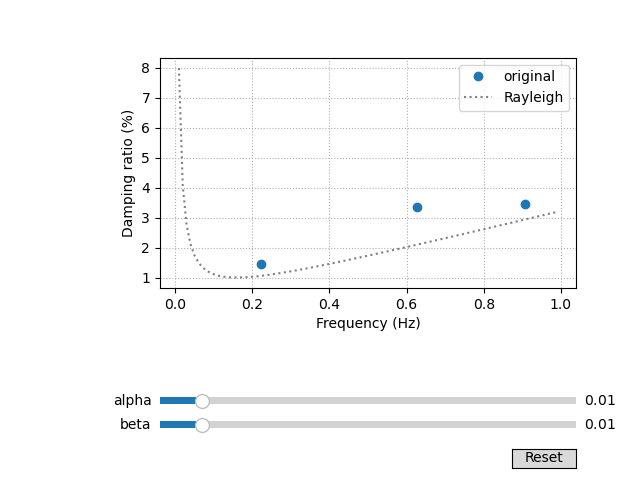

In [15]:
from iplot import interactive_plot_1
plt.show()

When you are done tweaking $\alpha$ and $\beta$, store your preferred values as  `alpha` and `beta`. 

In [16]:
alpha, beta = None, None

alpha, beta = 0.0115, 0.018

Let us check if you are matching the values of the original system:

In [17]:
assert alpha, "Did you define alpha?"
assert beta, "Did you define beta?"


C_r =alpha*K + beta*M
lamb_r, psi_r = calc_non_conservative_eigenvalues_eigenvectors(M,C_r,K)

damp_o = (calc_xi(lamb)*100)
damp_r = calc_xi(lamb_r)*100

assert np.abs(damp_o[0]-damp_r[0])<0.1, 'You are not matching the first damping ratio'
assert np.abs(damp_o[-1]-damp_r[-1])<0.1, 'You are not matching the third damping ratio'

Let us now use `frequency_response_function` from session3 to see how the transfer functions $H_{33}(\omega)$ looks like:

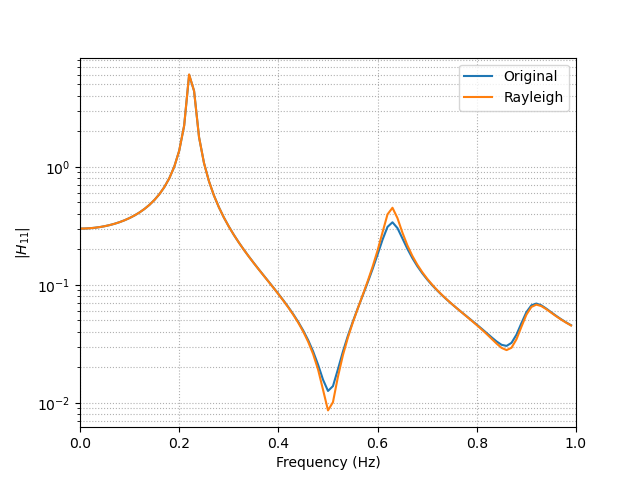

In [18]:
from session3 import frequency_response_function

f= np.arange(0,1,0.01)
H_11 = frequency_response_function(M,C,K,i=2,j=2, f=f)
H_11_r = frequency_response_function(M,C_r,K,i=2,j=2, f=f)


plt.figure()
plt.semilogy(f,np.abs(H_11), label='Original')
plt.semilogy(f,np.abs(H_11_r), label='Rayleigh')
plt.grid(which='both', linestyle=':')
plt.xlim([0,1])
plt.legend()
plt.xlabel('Frequency (Hz)')
yl=plt.ylabel('$|H_{11}|$')
plt.show()


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 2.2:</b> 
Consider the transfer function shown above. For yourself answer the following questions
- Why weren't you able to match all three damping values?
- How was the damping of the second mode represented using Rayleigh damping, was it under- or overestimated?
- How did this impact the transfer function?
</div>

<details>
    <summary><b> Click to get the answers </b></summary>
    
- Damping values are independent of eachother (i.e. there is no explicit link between the damping values of different modes). Rayleigh damping introduces such a hard link. However, as you only have two factors to play with (alpha and beta) you can only match 2 out of three. 
    
- The damping ratio of the second mode was underestimated by the Rayleigh model.
    
- The peak of the second resonance frequency was higher than the original system, also around the neighbouring anti-resonances there is a minor mismatch. The rest of the spectrum is not affected too much.
</details>  

## Two flavors of modal damping

Rayleigh damping will allow us to project again on the modal space, but sadly we weren't able to match the damping of all modes. As an alternative solution we can perhaps look back into modal damping and its two flavors:

- **Loss factor**: Constant modal damping
- **Modal damping**: A dedicated damping for each mode


To work with modal damping we have to return to the modal domain and treat our system as a linear combination of damped SDOF oscillators:

$$
X(\omega)= \sum_{j=1}^{n}\frac{\psi_j^TF(w)\psi_j}{\mu_j(\omega_j^2-\omega^2+2i\xi_j\omega\omega_j)}
$$


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.1:</b> 
Finish the function `FRF_based_on_modal_parameters` below to calculate the frequency/harmonic response of a damped SDOF oscillator. Which takes the frequency vector `f`, the input location and modal properties of mode j `omega_j`, `mu_j`, `psi_j` and `xi_j` as inputs. 
In the implementation F is assumed to be not a function of w.
</div>

*** Tips ***: To divide elementwise a matrix of shape (3,) and a matrix of shape (100,) you can use `np.outer(matrix1,1/matrix2)` to get a matrix of shape (3,100) with the elementwise division of the two matrices.


In [19]:
import numpy as np

def FRF_based_on_modal_parameters(mu_list: list , w_list: list , xi_list: list, 
                                  psi: np.ndarray, force_amplitude: np.ndarray, freq_axis: np.ndarray):
    """
    A function that computes the Frequency Response Function (FRF) based on the modal parameters of the system.
    
    Arguments:
    mu_list -- list of modal masses as per the modal decomposition (size n_modes)
    w_list -- list of modal frequencies as per the modal decomposition (size n_modes)
    xi_list -- list of modal damping ratios as per the modal decomposition (size n_modes)
    psi -- mode shapes matrix (n_dof x n_modes)
    force_vector -- the force vector applied to the system in physical coordinates (size n_dof)
    freq_axis -- frequency axis (1D array) to calculate the FRF for
    
    Returns:
    frf -- frequency response function matrix (n_dof x len(freq_axis))
    """
    n_modes = len(mu_list)
    assert len(w_list) == n_modes, "w_list must have the same length as mu_list."
    assert len(xi_list) == n_modes, "xi_list must have the same length as mu_list."
    assert psi.shape[1] == n_modes, "psi should have the same number of columns as the number of modes."
    assert len(force_amplitude) == n_modes, "force_vector must have the same size as the number of DOFs."
    assert freq_axis.ndim == 1, "freq_axis must be a 1D array."
    
    # Initialize the FRF as zeros (n_dof x len(freq_axis))
    frf = np.zeros((psi.shape[0], len(freq_axis)), dtype=complex)
    omega = freq_axis * 2 * np.pi

    # Loop through each mode
    for j in range(n_modes):
        mu_j  = mu_list[j]
        w_j   = w_list[j]
        xi_j  = xi_list[j]
        psi_j = psi[:,j]
        
        modal_force_j = psi_j.T@force_amplitude
        modal_response_j = modal_force_j/(mu_j*(w_j**2 - omega**2 + 2j*xi_j*w_j*omega))
        physical_contribution_j = np.outer(psi_j, modal_response_j)
        
        frf += physical_contribution_j

    return frf


Let us check you've implemented it correctly

In [20]:
M_test = np.array([[1, 0], [0, 1]])
K_test = np.array([[32, -16], [-16, 16]])
C_test = np.array([[0.1, -0.05], [-0.05, 1]])
lamb_test, psi_test = linalg.eig(K_test, M_test)  
M_test_prj, C_test_prj, K_test_prj = list(map(lambda x: psi_test.T @ x @ psi_test, [M_test, C_test, K_test]))
mu_list_test, w_list_test, b_list_test = list(map(lambda x: np.diag(x), [M_test_prj, K_test_prj, C_test_prj]))
xi_list = b_list_test / (2 * mu_list_test * w_list_test)
force_amplitude = np.array([[1],[0]])
freq_axis = np.linspace(0, 10, 100)
frf_test = FRF_based_on_modal_parameters(mu_list_test, w_list_test, xi_list, psi_test, force_amplitude, freq_axis)
assert frf_test.shape == (2, 100)
assert np.isclose(np.abs(frf_test).sum(),1,atol=0.01)

### Loss factor

Modeling a system with a loss factor implies using a constant modal damping for every mode. In the following segment we'll build an equivalent model to the 3DOF model using a single loss factor $\eta$.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.2:</b> 
Use the widget below to select a single loss factor, target to represent the damping of the second and third mode as good as possible. 
    
</div>


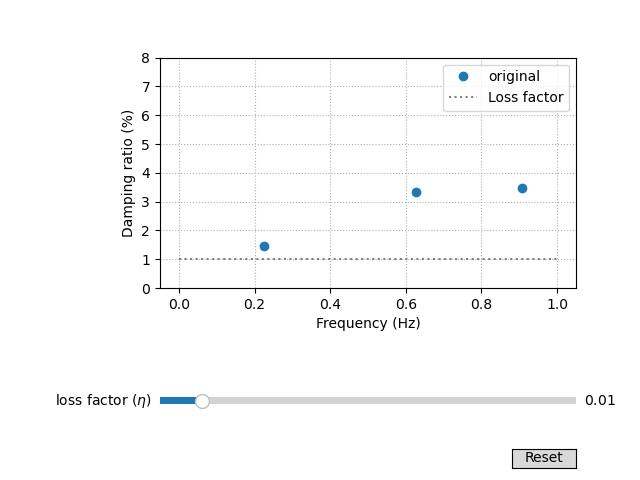

In [21]:
from iplot import interactive_plot_2

Ok, let us save the value from the widget into the variabe: `loss_factor`

In [22]:
loss_factor = None

loss_factor = 0.0337

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.3:</b> 
Complete the cell below to compute the SDOF response of all three modes, using the loss factor you found in the previous exercise. Use them to compute the response at $X_3$ to a force of amplitude 1 apllied at the third DOF.
save the results in the variable `frf_3_loss_factor_damping`, 
</div>


In [23]:
freq_axis= np.arange(0,1,0.01)
mu_list = None
xi_list = None
w_list = None
force_amplitude = None
frf_3_loss_factor_damping = None

mu_list = np.diag(M_prj)
k_list = np.diag(K_prj)
w_list = np.sqrt(k_list/mu_list)
n_modes = M.shape[0]
xi_list = np.full(n_modes, loss_factor)

force_amplitude = np.array([0,0,1])

frf_all = FRF_based_on_modal_parameters(mu_list, w_list, xi_list, psi_c, force_amplitude, freq_axis)

frf_3_loss_factor_damping = frf_all[2,:]

Let us check some basic properties (NOTE this won't cover all errors, you'll need to be attentive!)

Now let us plot your response on top of the original transfer function $H_{33}(f)*F$ (with F a force of amplitude 1)

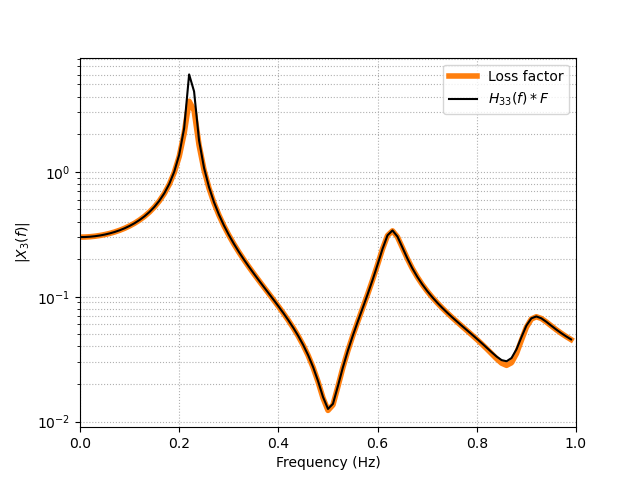

In [24]:
plt.figure()
H_33 = frequency_response_function(M,C,K,i=2,j=2, f=f)*1

plt.semilogy(f, np.abs(frf_3_loss_factor_damping), color='tab:orange', linewidth=4, label='Loss factor')
plt.semilogy(f,np.abs(H_33), color='black',label='$H_{33}(f)*F$')

plt.grid(which='both', linestyle=':')
plt.legend()
plt.ylabel('$|X_3(f)|$')
plt.xlabel('Frequency (Hz)')
_= plt.xlim([0,1])

In [25]:
freq_02_mask = np.abs(freq_axis-0.2)<0.05
assert np.isclose(np.abs(frf_3_loss_factor_damping-H_33)[freq_02_mask].sum(), 6.6, atol=0.5)
# rest should be 0.5
assert np.isclose(np.abs(frf_3_loss_factor_damping-H_33)[~freq_02_mask].sum(), 0.5, atol=1)


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.4:</b> 
Consider the transfer function shown above. For yourself answer the following questions:
- Why weren't you able to match all three damping values?
- How was the damping of the three modes represented using the loss factor?
- How did this impact the transfer function?
</div>

<details>
    <summary><b> Click to get the answers </b></summary>
    
- The loss factor sets all damping ratios equal, as they are not equal we can only match one.
    
- The second and third mode were well represented as they had similar modal damping. The first mode was overestimated, too much damping.
    
- The peak of the first resonance frequency was lower than the original system, but higher order dynamics were caught well.

</details>  

### Modal damping

The final option is to work with modal damping, in it we use the actual modal damping ratios of each mode of the MDOF system and feed this into our damped oscillators. 

<b> Assignment 3.5:</b> 
Similar to assignment 3.3 , complete the cell below to compute the SDOF response of all three modes, using **the modal damping approach**. Use them to compute the response at $X_3$ to a force of amplitude 1.
save the results in the variable `frf_3_modal_damping`,
</div>


In [26]:
all_sdofs = []

freq_axis= np.arange(0,1,0.01)
mu_list = None
xi_list = None
w_list = None
force_ampltude = None
frf_3_modal_damping = None

mu_list = np.diag(M_prj)
k_list = np.diag(K_prj)
w_list = np.sqrt(k_list/mu_list)
xi_list = xi_md 

force_ampltude = np.array([0,0,1])

frf_all = FRF_based_on_modal_parameters(mu_list, w_list, xi_list, psi_c, force_ampltude, freq_axis)

frf_3_modal_damping = frf_all[2,:]

Now let us plot your response on top of the original transfer function $H_{33}(f)*F$ (with F a force of amplitude 1). We can compare our result with the results using the loss factor.

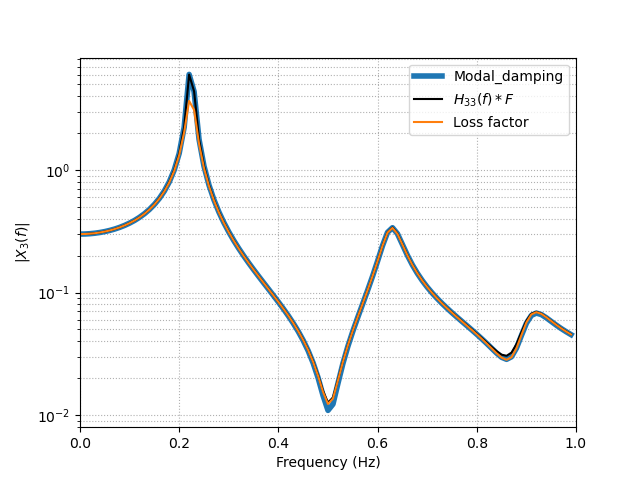

In [27]:
plt.figure()
X_33 = frequency_response_function(M,C,K,i=2,j=2, f=f)*1

plt.semilogy(f, np.abs(frf_3_modal_damping), color='tab:blue', linewidth=4, label='Modal_damping')

plt.semilogy(f,np.abs(H_33), color='black',label='$H_{33}(f)*F$')
plt.semilogy(f, np.abs(frf_3_loss_factor_damping), color='tab:orange', label='Loss factor')

plt.grid(which='both', linestyle=':')
plt.legend()
plt.ylabel('$|X_3(f)|$')
plt.xlabel('Frequency (Hz)')
_= plt.xlim([0,1])

## Systems with a lot of damping

Let us explore the limits of the modal damping method. Consider the widget below in which you can use the slider to include a multiplier on the damping matrix $C$ of the MDOF system of interest.

y


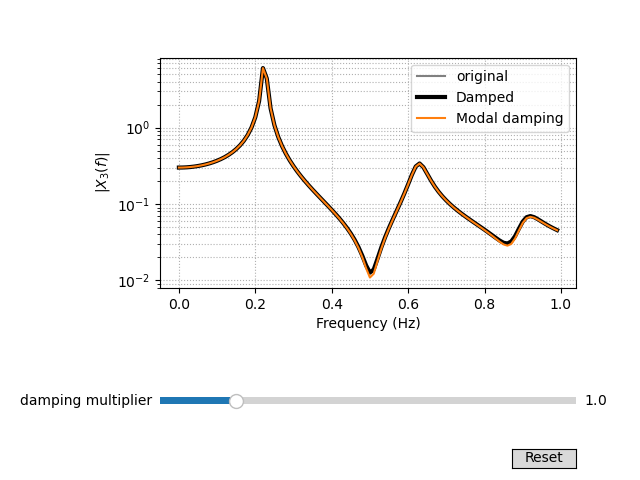

In [28]:
from iplot import interactive_plot_3

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 3.6:</b> 
Consider the transfer function shown above. Answer the following questions for yourself:
- Is modal damping effective for all values of the damping multiplier?
- In which regions does the modal damping start to lose accuracy?
</div>

<details>
    <summary><b> Click to get the answers </b></summary>
    
- It works best for small values of damping, but errors start to appear at higher damping values.
    
- In particular around anti-resonance a difference starts to appear.
    
</details>  

Up to this point we talked about MDOF systems and how a complex damping matrix can make things a bit more challenging. We showed how Rayleigh and modal damping could be used to still allow to model our system as a linear combination of SDOF systems. And how we do introduce an error in our systems as a result. Now let us focus on a different topic, also related with damping; Self excited vibrations.

# Self excited vibrations

Self excited vibrations are one of the more intriguing engineering problems. A well known example is the so-called flutter a phenomenon nicely illustrated in this video:


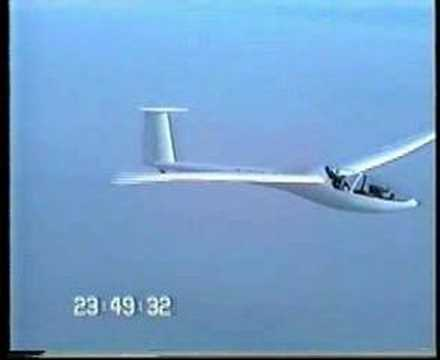

In [29]:
from IPython.display import YouTubeVideo

YouTubeVideo('kQI3AWpTWhM', width=800)

To discuss this problem we first take a step back and look at the behaviour of a damped SDOF system. We will do so by looking at the response of a SDOF system responding to white noise.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.1:</b> 
Complete the function `white_noise_force` below to make a white noise generator using numpy? You can choose the amplitude yourself but keep it zero mean!
</div>

**Tip**: maybe you can find the answer online?

In [30]:
def white_noise_force(no_samples):
    """
    A function that serves to generate a zero-mean white noise signal of a length 'no_samples'.
    """
    np.random.seed(43) # DO NOT REMOVE:  Fixing the random seed, so the randomness is a bit predictable
    
    f = np.random.randn(no_samples)
    
    return f

Let us check your solution

In [31]:
no_samples = 1000
f_white = white_noise_force(no_samples)
assert len(f_white) == no_samples, "Your code is not returning the number of samples requested"
assert np.isclose(np.mean(f_white), 0, atol=0.1), "Your signal is not zero mean"
assert np.std(f_white)>0, "Your white noise is actually a constant"

assert np.round(f_white[0],5) == 0.25740, "Did you change the seed of the random noise?"


Now that we have a force to work with, let us start from our past work on the SDOF system.  We'll import `impulse_response` from the Session on SDOF systems. Which allows us to calculate the impulse response of a SDOF system based on the $m$, $c$ and $k$ values.

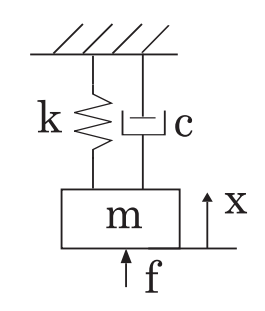

Let us revisit the SDOF system of the first session and take:

- a mass of $1kg$
- a stiffness of $16N/m$
- a damping coefficient of $0.1 Ns/m$.

<b> Assignment 4.2:</b> 
Use `impulse_response` to complete `sdof_force_response` a function that returns the response of a SDOF system excited by any force. 
</div>

**TIP** you can access the documentation of `impulse_response` through the use of `?impulse_response`


In [32]:
from session2 import impulse_response

def sdof_force_response(m:float,c:float,k:float,t:np.ndarray, f:np.ndarray):
    """
    Implement the reponse of an SDOF system to 
    
    Arguments:
    m, c and k -- Parameter of the system 
                -- m is in kg
                -- c is in N.s.m^-1
                -- k is in N.m^-1
    t          -- Time vector, containing the timesteps 
    f          -- Force vector, i.e. white noise
    
    Returns:
    x -- the response of the SDOF system for the timesteps in the Time vector t
    """
    dt = t[1] - t[0]
    h = impulse_response(m, c, k, t)
    x = np.convolve(f, h)[:len(t)] #* dt

    return x

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 4.3:**
Now use `sdof_force_response` and `white_noise_force` to determine the response of the SDOF system shown above to white noise, call the resulting timeseries `x_whitenoise` and the force `f_white_noise`. The timevector `t` is already given. Use `ax.plot` to plot the response on top of the initial force.
</div>

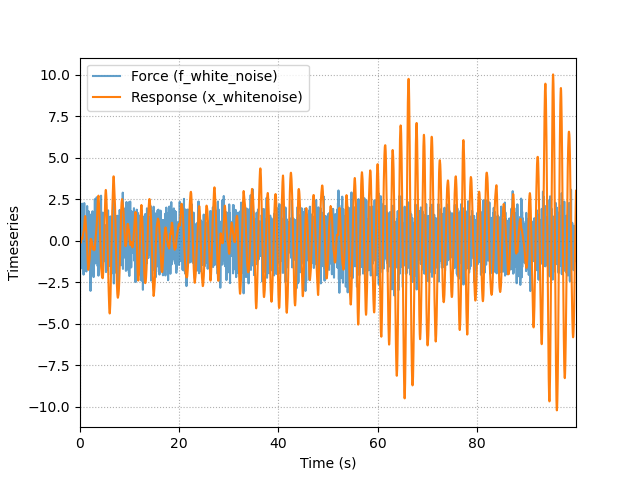

In [33]:
t = np.arange(start=0,stop=100,step=0.02)
fig, ax= plt.subplots()

m = 1.0
k = 16.0
c = 0.1

f_white_noise = white_noise_force(len(t))
x_whitenoise = sdof_force_response(m, c, k, t, f_white_noise)
x_whitenoise = x_whitenoise - np.mean(x_whitenoise)

ax.plot(t, f_white_noise, label='Force (f_white_noise)', alpha=0.7)
ax.plot(t, x_whitenoise, label='Response (x_whitenoise)')
ax.legend()

ax.set_ylabel('Timeseries')
ax.set_xlabel('Time (s)')
ax.grid(which='both',linestyle=':')
ax.set_xlim([0,max(t)])
plt.show()

Let us quickly do some checks before we continue:

In [34]:
assert len(x_whitenoise)==len(t), "Did you use the correct timevector t?"
assert len(f_white_noise) == len(t), "Did you use the correct timevector t?"
assert max(x_whitenoise)>max(f_white_noise), "Your response is smaller than your initial force, that is atypical double check your results"
assert np.isclose(np.mean(x_whitenoise), 0, atol=0.1), "Your response should also be zero mean"

# A bit more advanced testing
most_energetic_frequency = np.fft.fftfreq(len(x_whitenoise), 0.02)[np.argmax(np.abs(np.fft.fft(x_whitenoise)))]
assert np.isclose(np.sqrt(16/1),most_energetic_frequency*2*np.pi, atol=0.2), "What am I checking here?"



So now let us use what we just built to study the behaviour of a SDOF system under white noise excitation. At the same time we can get more familiar with the pole-residu representation of a system. 

Use the widget below to study the impact of the damping and the stiffness on the system's response to white noise. On the left you'll see the response as calculated by your implementation of `sdof_force_response` for various values of damping and stiffness. On the right you see the pole-residu representation of the system of interest.

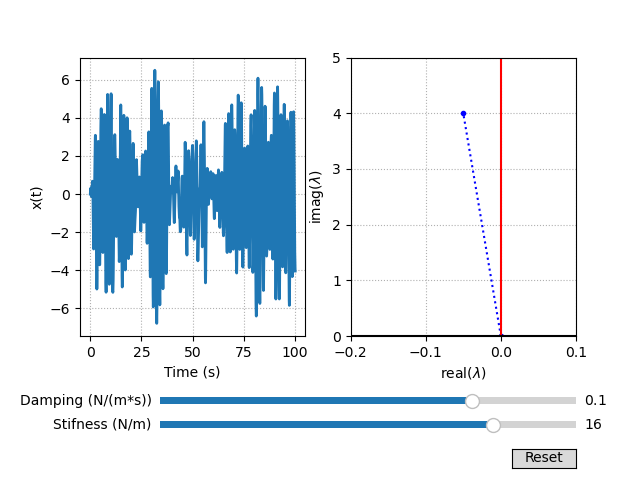

In [35]:
from iplot import interactive_plot_flutter


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

<b> Assignment 4.3:</b> 
Consider the widget above. Answer the following questions for yourself:
- How does the system response evolve for decreasing amounts of damping?
- Why does the pole in the pole-residu model vary with decreasing amounts of damping? Why?
- Is there a tipping point, when the behaviour changes dramatically?
- How does that tipping point relate to the pole-residu representation on the right?
- How does the system response evolve for very small values of stiffness?
</div>

<details>
    <summary><b> Click to get the answers </b></summary>
    
- For lower amounts of damping the amplitude of the response increases, nothing else really changes
    
- The pole moves in a circle to the right (but on the widget it looks like a straight line due to the axis not being square and k>>>c), as nothing is changed on the mass and stiffness the omega_n of the pole does not vary. 
    
- As soon as damping becomes negative, the amplitude continues to increase.
    
- The pole moves into the unstable region.
    
- The displacement has very little dynamics, a big amplitude occurs but very little oscillations happen.
    
</details>  
